# Exercise 5.1

This notebook aims to respond to point `5.1` of the script `SISTCA_2023-24_Lab_Script_Template_V3_19May2024`.

As an initial exercise, you are asked to research and collect data from a region with coordinates `(-60.6934,-7.1091,-60.0958,-6.9411)`, using Sentinel2 `'S2-16D-2'` over a period of `'2020-08-01/2022-05-01'`. You must extract information from the `red` `blue` and `green` bands, and build the respective image.

Installing Packages and Dependencies

In [1]:
!pip install pystac-client==0.3.2

In [2]:
!pip install rasterio shapely matplotlib tqdm wtss[matplotlib]

In [3]:
import pystac_client

In [4]:
from wtss import *

In [5]:
import rasterio
from rasterio.crs import CRS
from rasterio.warp import transform
from rasterio.windows import from_bounds

Connection to the Brazil Data Cube API

To perform the necessary operations, you must use the `pystac_client` api. To find out all about its features, you can consult [STAC client for Python](https://github.com/brazil-data-cube/stac.py).

In [6]:
parameters = dict(access_token='r5p7J7kpqIbnPY47jX4i8YfaVcKq7iPFsO3nQQ6OpF') #Change token
service_STAC = pystac_client.Client.open('https://brazildatacube.dpi.inpe.br/stac/', parameters=parameters)

In [7]:
service_WTSS = WTSS('https://brazildatacube.dpi.inpe.br/', 
               access_token='r5p7J7kpqIbnPY47jX4i8YfaVcKq7iPFsO3nQQ6OpF') #Change token

List of available products

In [8]:
for collection in service_STAC.get_collections():
    print(collection) 


<CollectionClient id=MOSAIC-S2-YANOMAMI-6M-1>
<CollectionClient id=CB4-MOSAIC-BRAZIL_64_3M_STK-1>
<CollectionClient id=MYD13Q1-6>
<CollectionClient id=LANDSAT-MOZ_30_1M_STK-1>
<CollectionClient id=LCC_L8_30_16D_STK_Amazonia-TC-1>
<CollectionClient id=LCC_S2_10_1M_STK_PA-SPC-AC-NA-1>
<CollectionClient id=CB4A-MOSAIC-PARAIBA_55_3M_STK-1>
<CollectionClient id=S2-MOSAIC-PARAIBA_10_3M_STK-1>
<CollectionClient id=LCC_C4_64_1M_STK_PA-SPC-AC-NA-1>
<CollectionClient id=LCC_C4_64_1M_STK_MT_PA-SPC-AC-NA-1>
<CollectionClient id=LCC_C4_64_1M_STK_MT_RF_PA-SPC-AC-NA-1>
<CollectionClient id=LC8-MOSAIC-BRAZIL_30_6M_MEDSTK-1>
<CollectionClient id=LCC_L8_30_1M_STK_Cerrado-1>
<CollectionClient id=S2-SEN2COR_10_16D_STK-1>
<CollectionClient id=LCC_S2_10_16D_STK_Amazonia-1>
<CollectionClient id=S2_L2A-1>
<CollectionClient id=LCC_L8_30_1M_STK_PA-SPC-AC-NA-1>
<CollectionClient id=LCC_C4_64_1M_STK_GO_PA-SPC-AC-NA-1>
<CollectionClient id=MOD13Q1-6>
<CollectionClient id=KD_S2_20M_VISBANDS_CURUAI-1>
<CollectionCli

Obtaining data for the script

In [9]:
service_WTSS['S2-16D-2'] 

# Lista todas as informações necessarias para realizar este guião:
#Banda
#Linha temporal disponível

name,common name,description,datatype,valid range,scale,nodata
B12,swir22,,int16,"{'min': 0.0, 'max': 10000.0}",0.0001,0.0
SCL,quality,,uint8,"{'min': 0.0, 'max': 11.0}",1.0,0.0
CLEAROB,ClearOb,Clear Observation Count,uint8,"{'min': 1.0, 'max': 255.0}",1.0,0.0
NDVI,ndvi,,int16,"{'min': -10000.0, 'max': 10000.0}",0.0001,-9999.0
NBR,nbr,,int16,"{'min': -10000.0, 'max': 10000.0}",0.0001,-9999.0
EVI,evi,Enhanced Vegetation Index,int16,"{'min': -10000.0, 'max': 10000.0}",0.0001,-9999.0
B01,coastal,,int16,"{'min': 0.0, 'max': 10000.0}",0.0001,0.0
B02,blue,,int16,"{'min': 0.0, 'max': 10000.0}",0.0001,0.0
B03,green,,int16,"{'min': 0.0, 'max': 10000.0}",0.0001,0.0
B04,red,,int16,"{'min': 0.0, 'max': 10000.0}",0.0001,0.0


In [10]:
timeline = service_WTSS['S2-16D-2'].timeline

start = timeline[0]
end = timeline[-1]

print(f'Intervalo Desponivel: [{start}, {end}]')

#Linha temporal disponivel

Intervalo Desponivel: [2017-01-01, 2022-09-30]


Obtaining the data files to be processed 

In [11]:
service_STAC.get_collection('S2-16D-2').get_items()      #Criação da colecção a onde guardar os objetos

<generator object CollectionClient.get_items at 0x7fed4e047df0>

De seguida vamos pesquisar pelas característica pretendidas

In [12]:
bbox=(-60.6934,-7.1091,-60.0958,-6.9411)
item_search = service_STAC.search(bbox=bbox,
                             datetime='2020-08-01/2022-05-01',
                             collections=['S2-16D-2'])

#bbox = dimensoes do quadrado de pesquisa a obter em conjunto com o mapa do BDC
#datetime = linha temporal pertendida a obter os ficheiros de informação
#collections= satelite que ira fornecer a informação

De seguida pode ver o número de itens disponíveis e depois listalos

In [13]:
item_search.matched()

82

In [14]:
for item in item_search.get_items():    #listagem de ficheiros de informação disponiveis 
    print(item)

<Item id=S2-16D_V2_015013_20220423>
<Item id=S2-16D_V2_016013_20220423>
<Item id=S2-16D_V2_015013_20220407>
<Item id=S2-16D_V2_016013_20220407>
<Item id=S2-16D_V2_015013_20220322>
<Item id=S2-16D_V2_016013_20220322>
<Item id=S2-16D_V2_015013_20220306>
<Item id=S2-16D_V2_016013_20220306>
<Item id=S2-16D_V2_015013_20220218>
<Item id=S2-16D_V2_016013_20220218>
<Item id=S2-16D_V2_015013_20220202>
<Item id=S2-16D_V2_016013_20220202>
<Item id=S2-16D_V2_015013_20220117>
<Item id=S2-16D_V2_016013_20220117>
<Item id=S2-16D_V2_015013_20220101>
<Item id=S2-16D_V2_016013_20220101>
<Item id=S2-16D_V2_015013_20211219>
<Item id=S2-16D_V2_016013_20211219>
<Item id=S2-16D_V2_015013_20211203>
<Item id=S2-16D_V2_016013_20211203>
<Item id=S2-16D_V2_015013_20211117>
<Item id=S2-16D_V2_016013_20211117>
<Item id=S2-16D_V2_015013_20211101>
<Item id=S2-16D_V2_016013_20211101>
<Item id=S2-16D_V2_015013_20211016>
<Item id=S2-16D_V2_016013_20211016>
<Item id=S2-16D_V2_015013_20210930>
<Item id=S2-16D_V2_016013_20

## Reading raster arrays  

In [15]:
assets = item.assets

In [16]:
# função retirada da galeria do github Brasil Data Cube

def read(uri: str, bbox: list, masked: bool = True, crs: str = None):
    """Read raster window as numpy.ma.masked_array."""
    source_crs = CRS.from_string('EPSG:4326')
    if crs:
        source_crs = CRS.from_string(crs)

    # Expects the bounding box has 4 values
    w, s, e, n = bbox
        
    with rasterio.open(uri) as dataset:
        transformer = transform(source_crs, dataset.crs, [w, e], [s, n])
        window = from_bounds(transformer[0][0], transformer[1][0], 
                             transformer[0][1], transformer[1][1], dataset.transform)
        return dataset.read(1, window=window, masked=masked)


Read data band by band using the read function

In [17]:
red = read(assets['B04'].href, bbox=bbox)               #Leitura e Aramazenamento dos Arrays dentro de uma varaivel
green = read(assets['B03'].href, bbox=bbox)             #Para visualizar algum Conteudo de um destes arrays basta,
blue = read(assets['B02'].href, bbox=bbox)              #colocar o nome da variavel numa celula nova como 

In [18]:
red

masked_array(
  data=[[246, 244, 281, ..., 267, 242, 247],
        [225, 237, 278, ..., 289, 257, 239],
        [230, 210, 259, ..., 307, 273, 258],
        ...,
        [218, 208, 207, ..., 1277, 1216, 1154],
        [230, 187, 199, ..., 1276, 1255, 1196],
        [198, 194, 183, ..., 1256, 1274, 1220]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=0,
  dtype=int16)

## Visualizing the plots

In [19]:
%matplotlib inline                                     
from matplotlib import pyplot as plt


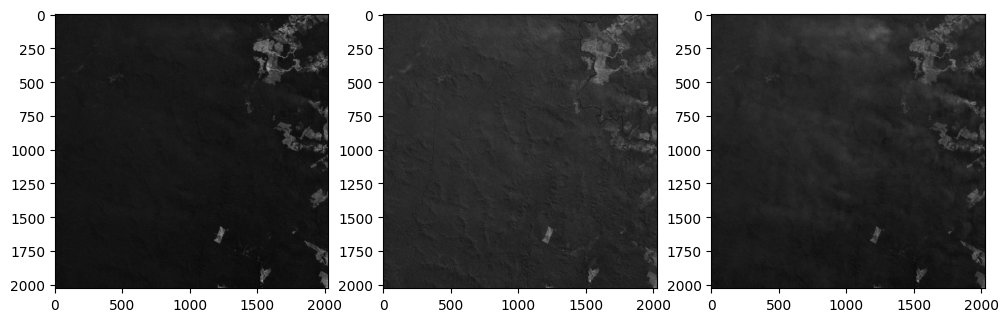

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12, 4))   #Visualização das Imagens da Respetiva Banda
ax1.imshow(red, cmap='gray')
ax2.imshow(green, cmap='gray')
ax3.imshow(blue, cmap='gray')

To be able to print the image in rgb we must first normalize the arrays from [0-->1] to use the `normalize()` function.

In [21]:
import numpy    
# função retirada da galeria do github Brasil Data Cube

def normalize(array):                                                    
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))



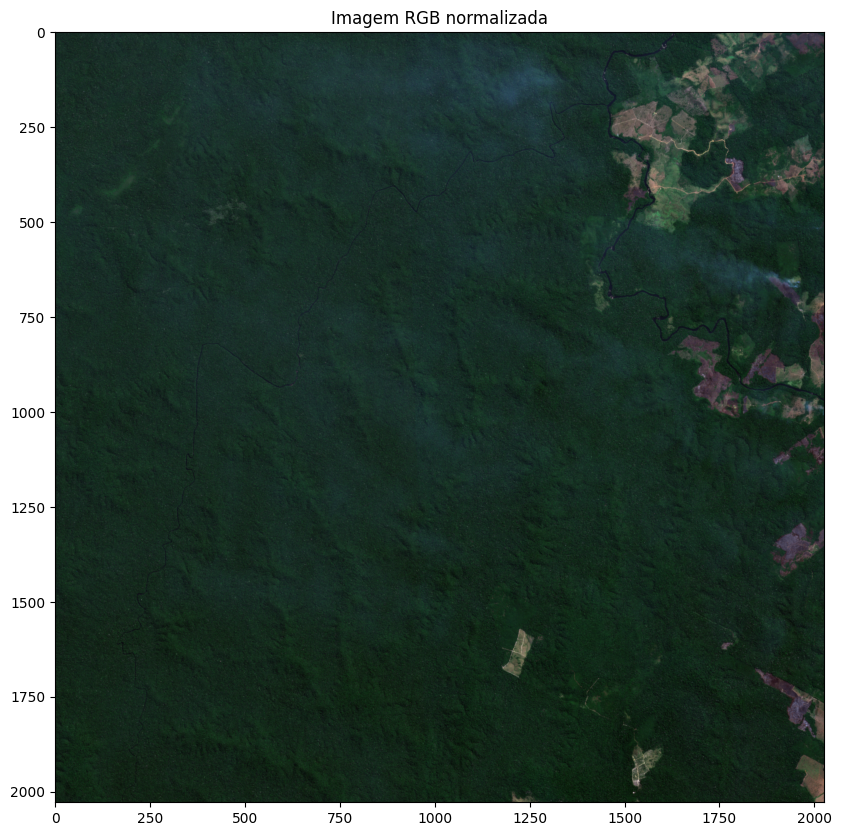

In [22]:
rgb = numpy.dstack((normalize(red), normalize(green), normalize(blue)))   #Plot da Imagen RGB

fig, (ax1) = plt.subplots(figsize=(10, 10))

ax1.set_title('Imagem RGB normalizada')
ax1.imshow(rgb)